This notebook is working with our data that came from school shootings, population and gun law grades.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
df = pd.read_csv('complete.csv')

In [4]:
#drop extra index
df = df.drop(df.columns[0], axis=1)

In [6]:
df.head()

,Date,School,City,State,Reliability Score (1-5),Killed (includes shooter),Wounded,Total Injured/Killed Victims,Gender of Victims (M/F/Both),Victim's Affiliation w/ School,...,Shooter Age,Shooter Gender,Shooter Race,Shooter Ethnicity,Shooter's Affiliation with School,Shooter had an accomplice who did not fire gun (Y/N),Hostages Taken (Y/N),Year,Grade,Population
0,2019-02-17,Eaglecrest High School,Aurora,CO,4.0,1,0.0,1,Male,Principal/Vice-Principal,...,31.0,M,Black,Not Hispanic or Latino,No Relation,N,N,2019,NaN,NaN
1,2019-02-14,V. Sue Cleveland High School,Rio Rancho,NM,4.0,0,0.0,0,No Victims,No Victims,...,16.0,M,Unknown,Unknown,Student,N,N,2019,NaN,NaN
2,2019-02-08,Frederick Douglass High School,Baltimore,MD,4.0,0,1.0,1,Male,Other Staff,...,25.0,M,Black,Not Hispanic or Latino,No Relation,N,N,2019,NaN,NaN
3,2019-02-05,Minneapolis School District Bus,Minneapolis,MN,3.0,0,1.0,1,Male,Other Staff,...,31.0,M,Unknown,Unknown,No Relation,N,N,2019,NaN,NaN
4,2019-01-31,Atascocita High School,Atascocita,TX,4.0,0,1.0,1,Male,Student,...,NaN,M,Unknown,Unknown,Student,Y,N,2019,NaN,NaN


In [8]:
#i had issues before with the data types so let's check them to prevent any issues
df.dtypes

Date                                                                                                                                                   object
School                                                                                                                                                 object
City                                                                                                                                                   object
State                                                                                                                                                  object
Reliability Score (1-5)                                                                                                                               float64
Killed (includes shooter)                                                                                                                               int64
Wounded                                             

In [111]:
#strip out the commas so that it can be changed into numbers
df['Population'] = df['Population'].str.replace(',', '')

In [112]:
#change data types to numbers
df = df.apply(pd.to_numeric, errors='ignore')

In [113]:
#let's check to make sure that it worked
df.dtypes

Date                                                                                                                                                   object
School                                                                                                                                                 object
City                                                                                                                                                   object
State                                                                                                                                                  object
Reliability_Score_(1-5)                                                                                                                               float64
Killed_(includes_shooter)                                                                                                                               int64
Wounded                                             

In [114]:
# replace column name whitespaces with underscores
df.columns = df.columns.str.replace(' ', '_')

In [115]:
# replace column name forward slash with underscores
df.columns = df.columns.str.replace('/', '_')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 51 columns):
Date                                                                                                                                                  1356 non-null object
School                                                                                                                                                1356 non-null object
City                                                                                                                                                  1356 non-null object
State                                                                                                                                                 1356 non-null object
Reliability_Score_(1-5)                                                                                                                               1354 non-null float64
Killed_(includes_shooter)            

In [116]:
#make a new dataframe that shows the corrilations between columns
corr = df.corr()

In [117]:
#let's take a look at this
corr

,Reliability_Score_(1-5),Killed_(includes_shooter),Wounded,Total_Injured_Killed_Victims,Victim's_age(s)_,Duration_(minutes),Number_of_Shots_Fired,Number_of_Shooters,Shooter_Age,Year,Population
Reliability_Score_(1-5),1.000000,0.253143,0.118648,0.194502,0.124069,0.024209,0.111729,0.019464,0.053287,0.170870,-0.022053
Killed_(includes_shooter),0.253143,1.000000,0.250063,0.581992,0.127005,0.027841,0.621641,-0.002469,0.094190,0.010976,0.024557
Wounded,0.118648,0.250063,1.000000,0.932764,-0.116166,0.083902,0.637745,0.136356,0.045746,-0.050027,0.170513
Total_Injured_Killed_Victims,0.194502,0.581992,0.932764,1.000000,0.020155,0.081713,0.743691,0.113155,0.073446,-0.037823,0.117760
Victim's_age(s)_,0.124069,0.127005,-0.116166,0.020155,1.000000,-0.010917,0.150525,-0.017919,0.624999,-0.031589,-0.017082
Duration_(minutes),0.024209,0.027841,0.083902,0.081713,-0.010917,1.000000,0.023976,0.011326,0.108099,-0.062518,-0.035791
Number_of_Shots_Fired,0.111729,0.621641,0.637745,0.743691,0.150525,0.023976,1.000000,0.248122,0.041132,-0.027881,-0.006169
Number_of_Shooters,0.019464,-0.002469,0.136356,0.113155,-0.017919,0.011326,0.248122,1.000000,-0.003303,-0.002386,-0.006716
Shooter_Age,0.053287,0.094190,0.045746,0.073446,0.624999,0.108099,0.041132,-0.003303,1.000000,0.075481,0.063801
Year,0.170870,0.010976,-0.050027,-0.037823,-0.031589,-0.062518,-0.027881,-0.002386,0.075481,1.000000,-0.029574


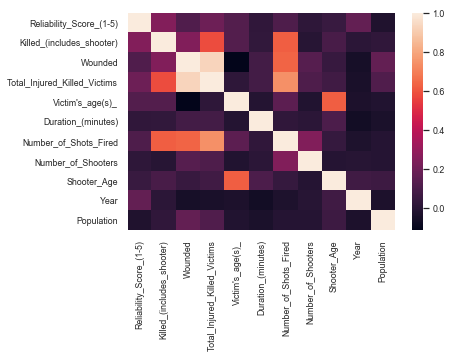

In [146]:
#heatmap of corrilations
sns.heatmap(corr)

In [118]:
#We have a lot of columns, I find it easier to work with having them printed out like this
df.columns

Index(['Date', 'School', 'City', 'State', 'Reliability_Score_(1-5)',
       'Killed_(includes_shooter)', 'Wounded', 'Total_Injured_Killed_Victims',
       'Gender_of_Victims_(M_F_Both)', 'Victim's_Affiliation_w__School',
       'Victim's_age(s)_', 'Victims_Race', 'Victim_Ethnicity',
       'Targeted_Specific_Victim(s)', 'Random_Victims', 'Bullied_(Y_N__N_A)',
       'Domestic_Violence_(Y_N)', 'Suicide_(Shooter_was_only_victim)_Y_N__N_A',
       'Suicide_(shot_self_immediately_following_initial_shootings)_Y_N__N_A',
       'Suicide_(e.g.,_shot_self_at_end_of_incident_-_time_period_between_first_shots_and_suicide,_different_location,_when_confronted_by_police)_Y_N__N_A',
       'Suicide_(or_attempted_suicide)_by_Shooter_(Y_N)',
       'Shooter's_actions_immediately_after_shots_fired',
       'Pre-planned_school_attack_(Columbine_style;_not_domestic)', 'Summary',
       'Category', 'School_Type', 'Narrative_(Detailed_Summary__Background)',
       'Sources', 'Time_of_First_Shot_(24h)', 'Du

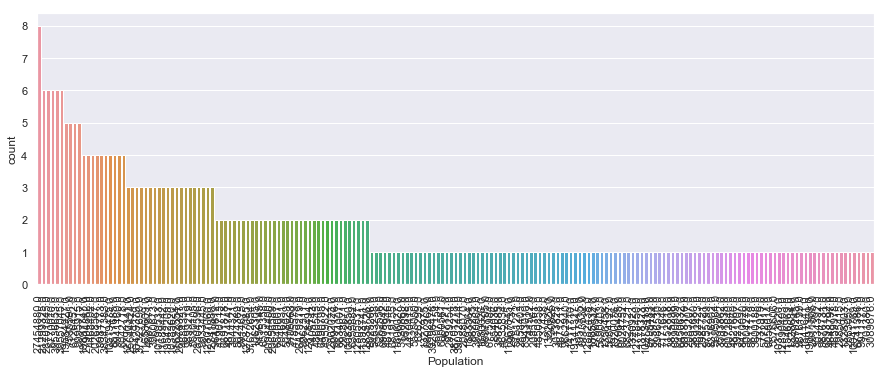

In [119]:
#lets see how population affects incidents
sns.set()
plt.figure(figsize=(15,5))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.8})
sns.set_palette("colorblind")
sax = sns.countplot(x="Population", data=df, order = df['Population'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.show()
#this graph is rubbish, we will make better ones in the future
#but the rainbow is pretty

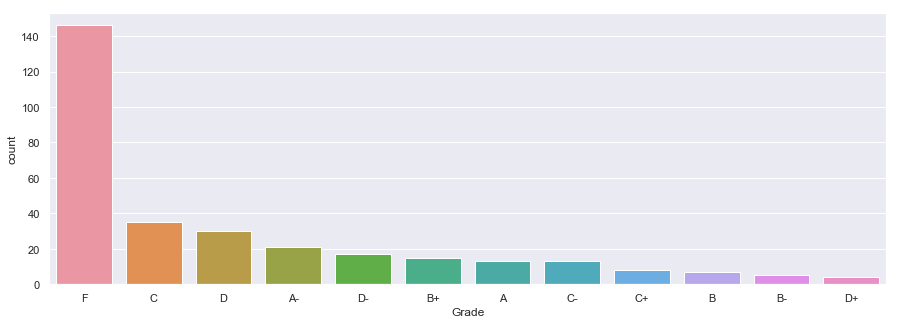

In [120]:
#let's look at the number of incedents by gun law grade
sns.set()
plt.figure(figsize=(15,5))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.8})
sns.set_palette("colorblind")
sax = sns.countplot(x="Grade", data=df, order = df['Grade'].value_counts().index)
plt.show()

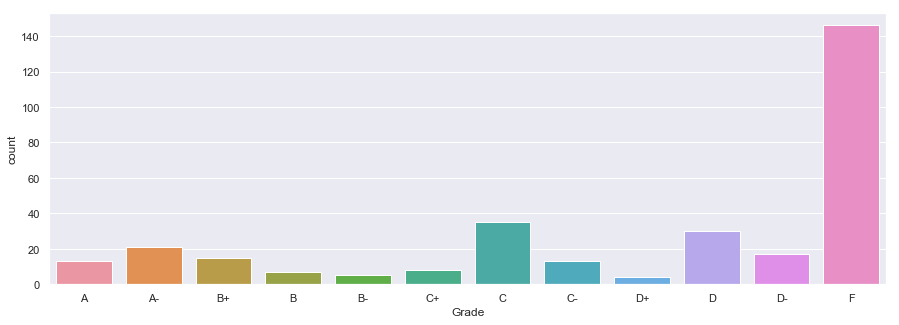

In [121]:
#the graph above is pretty good but let's make it better
#instead of being sorted by number of inceidents, let's sort it by grade
g = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.set()
plt.figure(figsize=(15,5))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.8})
sns.set_palette("colorblind")
sax = sns.countplot(x="Grade", data=df, order = g)
plt.show()

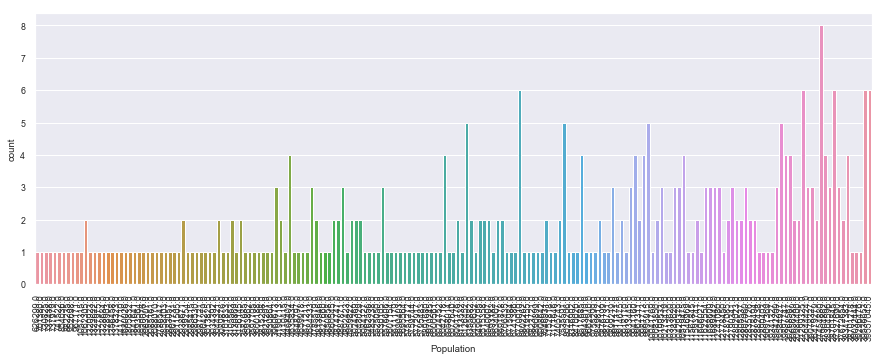

In [122]:
# Let's reorder the population graph from above in order of population
sns.set()
plt.figure(figsize=(15,5))
sns.set_context("notebook", font_scale=.8, rc={"lines.linewidth": 3.8})
sns.set_palette("colorblind")
sax = sns.countplot(x="Population", data=df)
plt.xticks(rotation=90)
plt.show()
#this version of the graph is much better, but its still not great
#Judah makes a much better one with population bins in his notebook

In [123]:
#make a new dataframe for only the incedents that we have a grade for the state's gun control laws
# aka 2012 - 2018
dfg = df[~df.Grade.isna()]

In [144]:
dfg.head()

,Date,School,City,State,Reliability_Score_(1-5),Killed_(includes_shooter),Wounded,Total_Injured_Killed_Victims,Gender_of_Victims_(M_F_Both),Victim's_Affiliation_w__School,...,Shooter_Age,Shooter_Gender,Shooter_Race,Shooter_Ethnicity,Shooter's_Affiliation_with_School,Shooter_had_an_accomplice_who_did_not_fire_gun_(Y_N),Hostages_Taken_(Y_N),Year,Grade,Population
15,2018-12-14,Winnetonka High School,Kansas City,MO,3.0,0,0.0,0,No Victims,No Victims,...,NaN,M,Unknown,Unknown,Student,Unknown,N,2018,F,6126452.0
16,2018-12-13,Dennis Intermediate School,Richmond,IN,3.0,1,0.0,1,Unknown,Unknown,...,14.0,M,Unknown,Unknown,Former Student,N,N,2018,D-,6691878.0
17,2018-12-11,Cawood Elementary School,Cawood,KY,3.0,0,2.0,2,Both,No Relation,...,NaN,Unknown,Unknown,Unknown,No Relation,Y,N,2018,F,4468402.0
18,2018-11-28,Strawberry Mansion High School,Philadelphia,PA,3.0,0,0.0,0,No Victims,No Victims,...,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,N,2018,C+,12807060.0
19,2018-11-22,Skyline High School,Dallas,TX,3.0,1,0.0,1,Male,Unknown,...,NaN,M,Black,Not Hispanic or Latino,Unknown,Y,N,2018,F,28701845.0


In [125]:
# because grades are catigorical, we want to create new columns of dummy variable 
grade_dummy = pd.get_dummies(dfg['Grade'],prefix = 'Grade')

In [126]:
grade_dummy.head()

,Grade_A,Grade_A-,Grade_B,Grade_B+,Grade_B-,Grade_C,Grade_C+,Grade_C-,Grade_D,Grade_D+,Grade_D-,Grade_F
15,0,0,0,0,0,0,0,0,0,0,0,1
16,0,0,0,0,0,0,0,0,0,0,1,0
17,0,0,0,0,0,0,0,0,0,0,0,1
18,0,0,0,0,0,0,1,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0,1


In [127]:
#running regressions didn't work with the "-" & "+" so I changed the names
# '-' became 'm'
# '+' became 'p'
grade_dummy = grade_dummy.rename(columns={'Grade_A-': 'Grade_Am', 'Grade_B+': 'Grade_Bp', 'Grade_B-': 'Grade_Bm','Grade_C+': 'Grade_Cp', 'Grade_C-': 'Grade_Cm', 'Grade_D+': 'Grade_Dp', 'Grade_D-': 'Grade_Dm'})

In [128]:
grade_dummy.head()

,Grade_A,Grade_Am,Grade_B,Grade_Bp,Grade_Bm,Grade_C,Grade_Cp,Grade_Cm,Grade_D,Grade_Dp,Grade_Dm,Grade_F
15,0,0,0,0,0,0,0,0,0,0,0,1
16,0,0,0,0,0,0,0,0,0,0,1,0
17,0,0,0,0,0,0,0,0,0,0,0,1
18,0,0,0,0,0,0,1,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0,1


In [129]:
#make a new df with the orginal data and the dummies
df_with_dummies = pd.concat([dfg, grade_dummy], axis = 1)
#drop the original grades and one dummy to aviod issues with regressions
df_with_dummies.drop(['Grade','Grade_F'],axis=1);

In [130]:
df_with_dummies.head()

,Date,School,City,State,Reliability_Score_(1-5),Killed_(includes_shooter),Wounded,Total_Injured_Killed_Victims,Gender_of_Victims_(M_F_Both),Victim's_Affiliation_w__School,...,Grade_B,Grade_Bp,Grade_Bm,Grade_C,Grade_Cp,Grade_Cm,Grade_D,Grade_Dp,Grade_Dm,Grade_F
15,2018-12-14,Winnetonka High School,Kansas City,MO,3.0,0,0.0,0,No Victims,No Victims,...,0,0,0,0,0,0,0,0,0,1
16,2018-12-13,Dennis Intermediate School,Richmond,IN,3.0,1,0.0,1,Unknown,Unknown,...,0,0,0,0,0,0,0,0,1,0
17,2018-12-11,Cawood Elementary School,Cawood,KY,3.0,0,2.0,2,Both,No Relation,...,0,0,0,0,0,0,0,0,0,1
18,2018-11-28,Strawberry Mansion High School,Philadelphia,PA,3.0,0,0.0,0,No Victims,No Victims,...,0,0,0,0,1,0,0,0,0,0
19,2018-11-22,Skyline High School,Dallas,TX,3.0,1,0.0,1,Male,Unknown,...,0,0,0,0,0,0,0,0,0,1


In [131]:
#lets just make sure that everything that should be a number is a number
df_with_dummies = df_with_dummies.apply(pd.to_numeric, errors='ignore')

In [132]:
int(df_with_dummies['Population'][:1].values[0])

6126452

In [133]:
#time to run some regressions!
#from our previous corrilations lets look at 2 variables that were corrilated 
# Total Injured/Killed Victims compaired to Number of Shots Fired
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_reg_simple = ols(formula= "Total_Injured_Killed_Victims~Number_of_Shots_Fired", data=dfg).fit()
df_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Total_Injured_Killed_Victims   R-squared:                       0.002
Model:                                      OLS   Adj. R-squared:                 -0.003
Method:                           Least Squares   F-statistic:                    0.4323
Date:                          Wed, 06 Mar 2019   Prob (F-statistic):              0.512
Time:                                  15:08:18   Log-Likelihood:                -203.64
No. Observations:                           177   AIC:                             411.3
Df Residuals:                               175   BIC:                             417.6
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.8972      0.064     14.014      0.000       0.771       1.024
Number_of_Shots_Fired     0.0079      0.012      0.657      0.512      -0.016       0.032
==============================================================================
Omnibus:                       26.024   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.879
Skew:                           0.862   Prob(JB):                     1.62e-08
Kurtosis:                       4.376   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#OLS Regression of Number of Shots fired vs Gun Law Grade
df_reg_mult_dummy = ols(formula="Number_of_Shots_Fired~Grade_A+Grade_Am+Grade_B+Grade_Bp+Grade_Bm+Grade_C+Grade_Cp+Grade_Cm+Grade_D+Grade_Dp+Grade_Dm+Grade_F",
                               data=df_with_dummies).fit()
df_reg_mult_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Number_of_Shots_Fired   R-squared:                       0.200
Model:                               OLS   Adj. R-squared:                  0.146
Method:                    Least Squares   F-statistic:                     3.740
Date:                   Wed, 06 Mar 2019   Prob (F-statistic):           8.77e-05
Time:                           15:08:19   Log-Likelihood:                -508.83
No. Observations:                    177   AIC:                             1042.
Df Residuals:                        165   BIC:                             1080.
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0528      0.573      5.328      0.000       1.922       4.184
Grade_A       -0.2195      1.763     -0.124      0.901      -3.701       3.262
Grade_Am      -1.2751      1.477     -0.863      0.389      -4.192       1.642
Grade_B       12.9472      2.121      6.103      0.000       8.758      17.136
Grade_Bp      -1.1957      1.647     -0.726      0.469      -4.448       2.056
Grade_Bm      -1.0528      4.125     -0.255      0.799      -9.198       7.092
Grade_C       -0.3385      1.060     -0.319      0.750      -2.431       1.754
Grade_Cp      -2.0528      2.121     -0.968      0.335      -6.242       2.136
Grade_Cm      -0.3385      1.647     -0.206      0.837      -3.590       2.913
Grade_D       -1.6892      1.358     -1.243      0.215      -4.371       0.993
Grade_Dp      -0.0528      2.945     -0.018      0.986      -5.868       5.762
Grade_Dm      -0.3528      1.413     -0.250      0.803      -3.143       2.438
Grade_F       -1.3265      0.710     -1.869      0.063      -2.728       0.075
==============================================================================
Omnibus:                      247.705   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29699.556
Skew:                           5.657   Prob(JB):                         0.00
Kurtosis:                      65.442   Cond. No.                     1.76e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [135]:
#OLS Regression of Total Injured/Killed Victims vs Gun Law Grade
df_reg_mult_dummy = ols(formula="Total_Injured_Killed_Victims~Grade_A+Grade_Am+Grade_B+Grade_Bp+Grade_Bm+Grade_C+Grade_Cp+Grade_Cm+Grade_D+Grade_Dp+Grade_Dm+Grade_F",
                               data=df_with_dummies).fit()
df_reg_mult_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Total_Injured_Killed_Victims   R-squared:                       0.072
Model:                                      OLS   Adj. R-squared:                  0.039
Method:                           Least Squares   F-statistic:                     2.143
Date:                          Wed, 06 Mar 2019   Prob (F-statistic):             0.0175
Time:                                  15:08:25   Log-Likelihood:                -815.90
No. Observations:                           314   AIC:                             1656.
Df Residuals:                               302   BIC:                             1701.
Df Model:                                    11                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8700      0.269      6.946      0.000       1.340       2.400
Grade_A        1.8223      0.888      2.052      0.041       0.075       3.570
Grade_Am      -0.4414      0.718     -0.615      0.539      -1.855       0.972
Grade_B        3.4157      1.184      2.885      0.004       1.086       5.746
Grade_Bp      -0.6033      0.832     -0.725      0.469      -2.241       1.035
Grade_Bm      -0.2700      1.391     -0.194      0.846      -3.007       2.467
Grade_C       -0.6700      0.582     -1.152      0.250      -1.815       0.475
Grade_Cp      -1.3700      1.112     -1.232      0.219      -3.558       0.818
Grade_Cm       1.9762      0.888      2.226      0.027       0.229       3.723
Grade_D       -0.5700      0.619     -0.921      0.358      -1.787       0.647
Grade_Dp       0.1300      1.549      0.084      0.933      -2.918       3.178
Grade_Dm      -0.9876      0.787     -1.254      0.211      -2.537       0.562
Grade_F       -0.5618      0.369     -1.522      0.129      -1.288       0.165
==============================================================================
Omnibus:                      409.483   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29627.631
Skew:                           6.209   Prob(JB):                         0.00
Kurtosis:                      48.938   Cond. No.                     6.91e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [136]:
#OLS Regression of Total Injured/Killed Victims vs Gun Law Grade
df_reg_mult_dummy = ols(formula="Total_Injured_Killed_Victims~Population",
                               data=df_with_dummies).fit()
df_reg_mult_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Total_Injured_Killed_Victims   R-squared:                       0.014
Model:                                      OLS   Adj. R-squared:                  0.011
Method:                           Least Squares   F-statistic:                     4.420
Date:                          Wed, 06 Mar 2019   Prob (F-statistic):             0.0363
Time:                                  15:08:35   Log-Likelihood:                -825.49
No. Observations:                           314   AIC:                             1655.
Df Residuals:                               312   BIC:                             1662.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0995      0.291      3.776      0.000       0.527       1.672
Population  3.969e-08   1.89e-08      2.102      0.036    2.55e-09    7.68e-08
==============================================================================
Omnibus:                      438.756   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40483.462
Skew:                           6.935   Prob(JB):                         0.00
Kurtosis:                      56.869   Cond. No.                     2.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
#OLS Regression of Number of Shots fired vs Population
df_reg_mult_dummy = ols(formula="Number_of_Shots_Fired~Population",
                               data=df_with_dummies).fit()
df_reg_mult_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Number_of_Shots_Fired   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.006
Method:                    Least Squares   F-statistic:                   0.01103
Date:                   Wed, 06 Mar 2019   Prob (F-statistic):              0.916
Time:                           15:08:49   Log-Likelihood:                -528.53
No. Observations:                    177   AIC:                             1061.
Df Residuals:                        175   BIC:                             1067.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3266      0.555      4.194      0.000       1.232       3.422
Population -3.768e-09   3.59e-08     -0.105      0.916   -7.46e-08    6.71e-08
==============================================================================
Omnibus:                      338.890   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102293.811
Skew:                          10.033   Prob(JB):                         0.00
Kurtosis:                     119.050   Cond. No.                     2.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


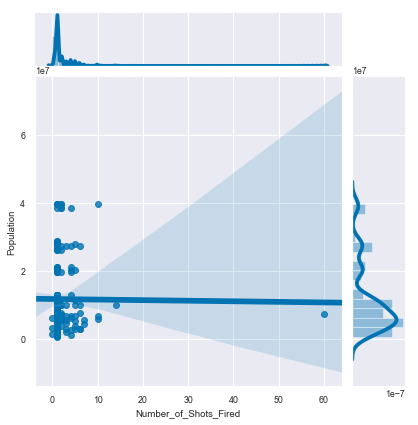

In [138]:
#let's graph some stuff
sns.jointplot(df_with_dummies['Number_of_Shots_Fired'], df_with_dummies['Population'],kind = 'reg')

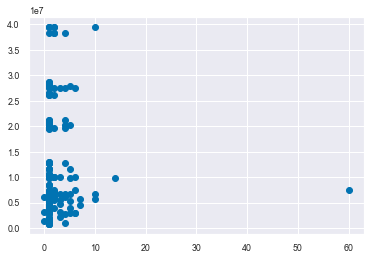

In [139]:
plt.scatter(df_with_dummies['Number_of_Shots_Fired'], df_with_dummies['Population'])

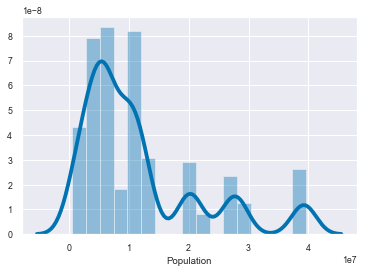

In [141]:
sns.distplot(df_with_dummies['Population'])

In [142]:
#OLS Regression of Number of Shots fired vs Gun Law Grade and Population
df_reg_mult_dummy = ols(formula="Number_of_Shots_Fired~Population+Grade_A+Grade_Am+Grade_B+Grade_Bp+Grade_Bm+Grade_C+Grade_Cp+Grade_Cm+Grade_D+Grade_Dp+Grade_Dm+Grade_F",
                               data=df_with_dummies).fit()
df_reg_mult_dummy.summary()
#Adding in Population didn't change R-squared or Adj. R-squared at all

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Number_of_Shots_Fired   R-squared:                       0.200
Model:                               OLS   Adj. R-squared:                  0.142
Method:                    Least Squares   F-statistic:                     3.418
Date:                   Wed, 06 Mar 2019   Prob (F-statistic):           0.000172
Time:                           15:09:25   Log-Likelihood:                -508.78
No. Observations:                    177   AIC:                             1044.
Df Residuals:                        164   BIC:                             1085.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9115      0.730      3.989      0.000       1.470       4.353
Population  1.311e-08   4.18e-08      0.314      0.754   -6.93e-08    9.56e-08
Grade_A       -0.5966      2.138     -0.279      0.781      -4.818       3.625
Grade_Am      -1.4207      1.552     -0.915      0.361      -4.486       1.645
Grade_B       12.9996      2.134      6.092      0.000       8.786      17.213
Grade_Bp      -1.1715      1.653     -0.709      0.480      -4.436       2.093
Grade_Bm      -1.0053      4.139     -0.243      0.808      -9.179       7.168
Grade_C       -0.3034      1.068     -0.284      0.777      -2.413       1.806
Grade_Cp      -1.9800      2.140     -0.925      0.356      -6.205       2.245
Grade_Cm      -0.3448      1.652     -0.209      0.835      -3.606       2.916
Grade_D       -1.6711      1.363     -1.226      0.222      -4.363       1.021
Grade_Dp       0.0366      2.967      0.012      0.990      -5.821       5.895
Grade_Dm      -0.2947      1.429     -0.206      0.837      -3.117       2.527
Grade_F       -1.3365      0.713     -1.876      0.062      -2.743       0.070
==============================================================================
Omnibus:                      247.766   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29729.199
Skew:                           5.659   Prob(JB):                         0.00
Kurtosis:                      65.474   Cond. No.                     2.96e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.82e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [145]:
#OLS Regression of Total Injured/Killed Victims fired vs Gun Law Grade and Population
df_reg_mult_dummy = ols(formula="Total_Injured_Killed_Victims~Population+Grade_A+Grade_Am+Grade_B+Grade_Bp+Grade_Bm+Grade_C+Grade_Cp+Grade_Cm+Grade_D+Grade_Dp+Grade_Dm+Grade_F",
                               data=df_with_dummies).fit()
df_reg_mult_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Total_Injured_Killed_Victims   R-squared:                       0.076
Model:                                      OLS   Adj. R-squared:                  0.039
Method:                           Least Squares   F-statistic:                     2.061
Date:                          Wed, 06 Mar 2019   Prob (F-statistic):             0.0193
Time:                                  15:14:23   Log-Likelihood:                -815.30
No. Observations:                           314   AIC:                             1657.
Df Residuals:                               301   BIC:                             1705.
Df Model:                                    12                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5937      0.372      4.282      0.000       0.861       2.326
Population  2.556e-08   2.38e-08      1.075      0.283   -2.12e-08    7.24e-08
Grade_A        1.0881      1.120      0.971      0.332      -1.116       3.292
Grade_Am      -0.6015      0.733     -0.820      0.413      -2.044       0.841
Grade_B        3.5492      1.190      2.982      0.003       1.207       5.892
Grade_Bp      -0.5700      0.833     -0.684      0.494      -2.209       1.069
Grade_Bm      -0.2340      1.391     -0.168      0.866      -2.971       2.503
Grade_C       -0.6248      0.583     -1.072      0.285      -1.772       0.523
Grade_Cp      -1.2967      1.114     -1.164      0.245      -3.488       0.895
Grade_Cm       1.9430      0.888      2.187      0.029       0.195       3.691
Grade_D       -0.5268      0.620     -0.850      0.396      -1.746       0.693
Grade_Dp       0.3264      1.559      0.209      0.834      -2.742       3.395
Grade_Dm      -0.8883      0.793     -1.121      0.263      -2.448       0.671
Grade_F       -0.5709      0.369     -1.547      0.123      -1.297       0.155
==============================================================================
Omnibus:                      407.152   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28825.748
Skew:                           6.155   Prob(JB):                         0.00
Kurtosis:                      48.296   Cond. No.                     1.22e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""